In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()

In [3]:
theta = 0.25 # true unknown parameter, P(HEAD)
a = 20 # parameter a of the prior
b = 10 # parameter b of the prior
n = 1000 # number of coin tosses. Try 5000!

In [4]:
dtheta = 1e-3 # discretization step for theta
theta_vec = np.arange(0, 1, dtheta) # discretized theta range

In [5]:
prior_fun = lambda theta: stats.beta.pdf(theta, a, b)

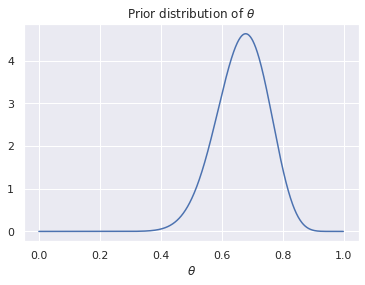

In [6]:
plt.plot(theta_vec, prior_fun(theta_vec))
plt.xlabel(r"$\theta$");
plt.title(r"Prior distribution of $\theta$");

In [7]:
y = np.random.binomial(n, theta)

In [8]:
# Approach 1: compute the posterior in closed-form (if you know an exact formula...)

exact_post_fun = lambda theta: stats.beta.pdf(theta_vec, a+y, b+n-y)

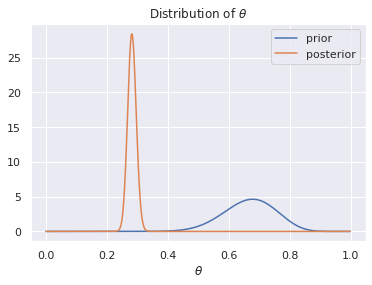

In [9]:
plt.plot(theta_vec, prior_fun(theta_vec), label="prior")
plt.plot(theta_vec, exact_post_fun(theta_vec), label="posterior")
plt.legend()
plt.xlabel(r"$\theta$");
plt.title(r"Distribution of $\theta$");

In [10]:
# Approach 2: normalize the product likelihood * prior

The likelihood function is:

$$\mathcal{L}(\theta) = {{N}\choose{k}} \theta^{y} \cdot (1-\theta)^{n-y}$$

The binomial coefficient ${{N}\choose{k}}$ does not depend on $\theta$ and thus it can be ignored

In [11]:
lik_y = (theta_vec ** y) * (1 - theta_vec)**(n-y) # unnormalized likelihood

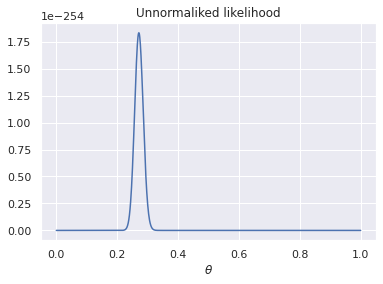

In [12]:
plt.plot(theta_vec, lik_y)
plt.xlabel(r"$\theta$");
plt.title("Unnormaliked likelihood");

In [13]:
p_theta_post = lik_y * prior_fun(theta_vec)
normalization_constant = (np.sum(p_theta_post) * dtheta)
p_theta_post = p_theta_post/normalization_constant

NOTE: the normalization constant is a numerical approximation (Riemann sum) of:
$$ \int_\theta p(\theta, y)\; d \theta. $$
Only in one (and sometimes 2) dimensions it is reasonable to approximate the integral numerically.

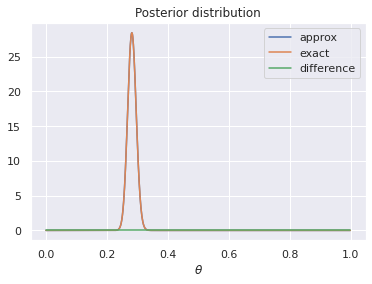

In [14]:
plt.plot(theta_vec, p_theta_post, label="approx")
plt.plot(theta_vec, exact_post_fun(theta_vec), label="exact")
plt.plot(theta_vec, p_theta_post - exact_post_fun(theta_vec), label="difference")
plt.xlabel(r"$\theta$");
plt.legend()
plt.title("Posterior distribution");

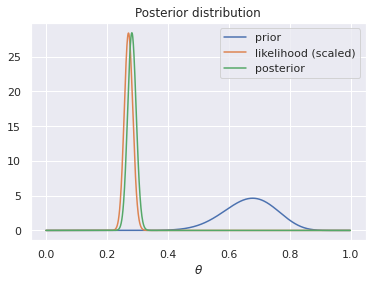

In [15]:
lik_y_scaled = lik_y/((np.sum(lik_y) * dtheta))

plt.plot(theta_vec, prior_fun(theta_vec), label="prior")
plt.plot(theta_vec, lik_y_scaled, label="likelihood (scaled)")
plt.plot(theta_vec, exact_post_fun(theta_vec), label="posterior")


plt.xlabel(r"$\theta$");
plt.legend()
plt.title("Posterior distribution");

Note: the scaled likelihood is also equivalent to the posterior for a flat prior over $[0, 1]$. A flat prior is also equivalent to a $\beta(a=1,b=1)$

What happen for large $n$ (e.g. $n = 5000$)?

Let us compute the log-likelihood:

$$\ell(\theta) = \log \mathcal{L}(\theta) = \log{{N}\choose{k}} + y \log \theta + (n-y) \log (1-\theta)$$

In [16]:
log_lik_y = y*np.log(theta_vec)  + (n-y)*np.log(1 - theta_vec) # unnormalized likelihood, up to a constant factor

/tmp/ipykernel_53129/919174022.py:1: RuntimeWarning: divide by zero encountered in log
  log_lik_y = y*np.log(theta_vec)  + (n-y)*np.log(1 - theta_vec) # unnormalized likelihood, up to a constant factor


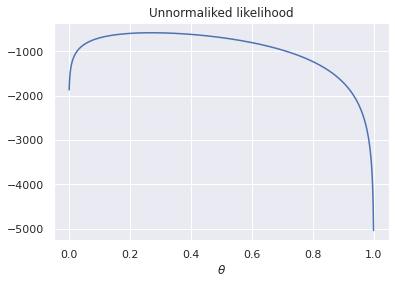

In [17]:
plt.plot(theta_vec, log_lik_y)
plt.xlabel(r"$\theta$");
plt.title("Unnormaliked likelihood");

Let us compute the log posterior:

$\log p_{post}(\theta) = \log p_{}...$

In [18]:
log_prior = np.log(prior_fun(theta_vec))

/tmp/ipykernel_53129/1761679711.py:1: RuntimeWarning: divide by zero encountered in log
  log_prior = np.log(prior_fun(theta_vec))


In [19]:
log_posterior = log_prior + log_lik_y

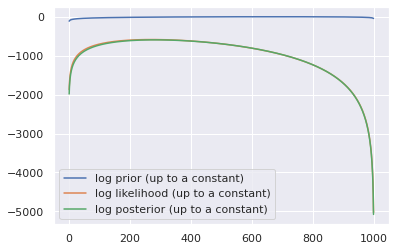

In [25]:
plt.plot(log_prior, label="log prior (up to a constant)")
plt.plot(log_lik_y, label="log likelihood (up to a constant)")
plt.plot(log_posterior, label="log posterior (up to a constant)")
plt.legend();

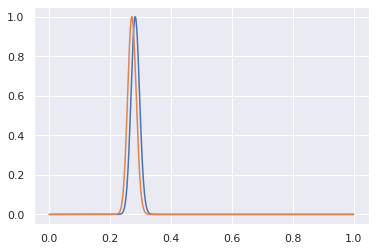

In [26]:
plt.plot(theta_vec, np.exp(log_posterior - np.max(log_posterior)), label="posterior");
plt.plot(theta_vec, np.exp(log_lik_y - np.max(log_lik_y)), label="log_posterior");